<a href="https://colab.research.google.com/github/pranjalikathait/Numerical-Programming-in-python/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual - Pranjali Kathait

# **Project Summary -**

In this project, the dataset we have got focuses on two types of hotel description i.e., a City Hotel and a Resort Hotel. This dataset is a compilation of 119390 rows and 32 columns.
To extract our needs from this dataset, I divided the data manipulation workflow in three steps:

Data Collection
Data Cleaning and manipulation
EDA (Exploratory Data Analysis)

In the first step, using different methods like head(), tail(), info(), describe(), columns()
and some other I analysed the data and cleared my understanding of the columns involved in the dataset like hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights.

Then I find out unique values in each columns thereby generating a list in tabular format. I also checked for datatype of each variable, and found that some of the columns do not have accurate datetype which in further steps gets converted into their desired datatype. Duplicate items also gets removed using drop method.

Now, before data visualization and getting different types of valuable charts out of that data, we have to perform data wrangling. For that, we checked for null or missing values in each column then dropped column which was having maximum number of null values i.e., 'company' column and for other columns having null or missing values, I filled them using .fillna().

Then using libraries like numpy, pandas, matplotlib and seaborn, number of charts were created for a better understanding of the data.



# **GitHub Link -**

https://github.com/pranjalikathait/Numerical-Programming-in-python.git

# **Problem Statement**


**Have you ever considered the best time of year to make a hotel reservation? Or have you ever wondered what the perfect length of stay is to get the greatest daily rate? What if you wanted to predict whether a hotel will receive an exceptionally large volume of special requests? This dataset on hotel bookings provides useful information for answering these questions. It includes reservation information for both city hotels and resort hotels, such as reservation dates, length of stay, number of guests, children, babies, and available parking spaces, among other criteria. It's worth noting that all personally identifiable information has been deleted from the dataset to ensure privacy and security.
Explore and analyse the data to identify key elements that influence bookings.**

#### **Define Your Business Objective?**

Analyzing the hotel dataset and digging out hidden and valuable insights that would have a positive influence on the booking rate.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

<ipython-input-3-819035602be7>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Dataset Loading

In [4]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

Mounted at /content/drive


### Dataset First View

In [5]:
# Dataset First Look
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
#First 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#Last 5 rows of the dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# **Data Exploration**

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
num_rows, num_columns= df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

print(df.index)
print(df.columns)


The dataset has 119390 rows and 32 columns.
RangeIndex(start=0, stop=119390, step=1)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
num_duplicates=df.duplicated().sum()
print("Total number of duplicate rows :",num_duplicates)

df.drop_duplicates(inplace=True)
unique_rows=df.shape[0]
print("Total number of unique rows :",unique_rows)

Total number of duplicate rows : 31994
Total number of unique rows : 87396


In [11]:
#viewing unique data
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
missing_values_count=df.isnull().sum()
print('Missing values count in each column ', missing_values_count)
null_values_count=df.isnull().sum().sum()
print(f'The dataset has {null_values_count} missing values.')

df.fillna(np.nan,inplace=True)
print("After replacing all the null values as nan: ")
df

Missing values count in each column  hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
com

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
miss_values=df.isnull().sum().sort_values(ascending=False)
miss_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


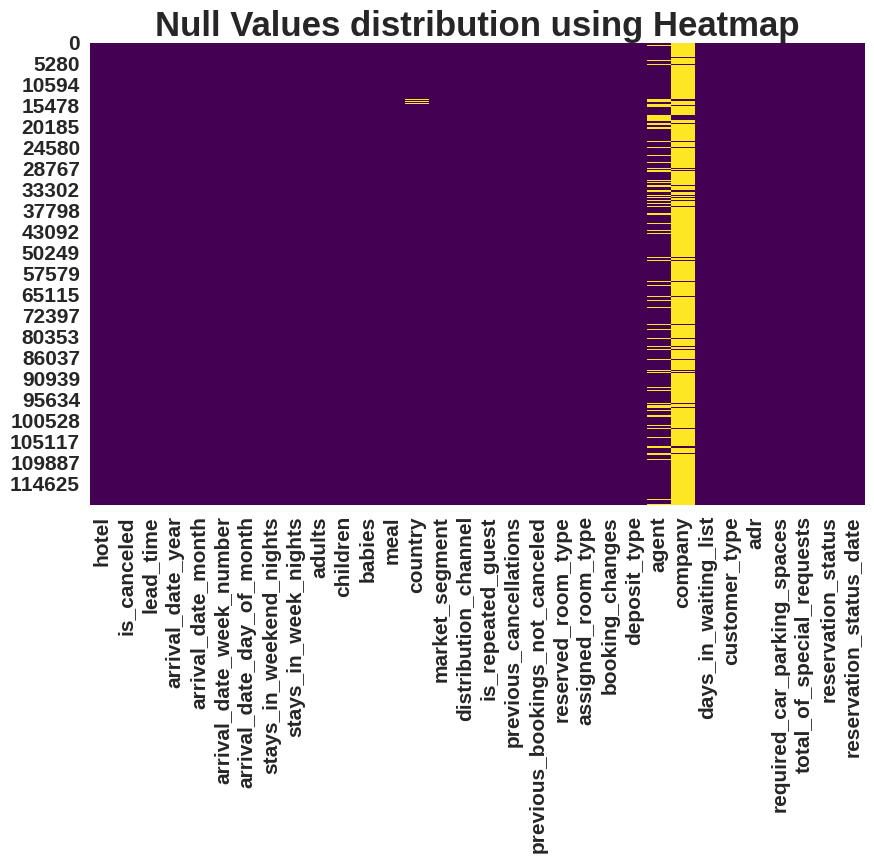

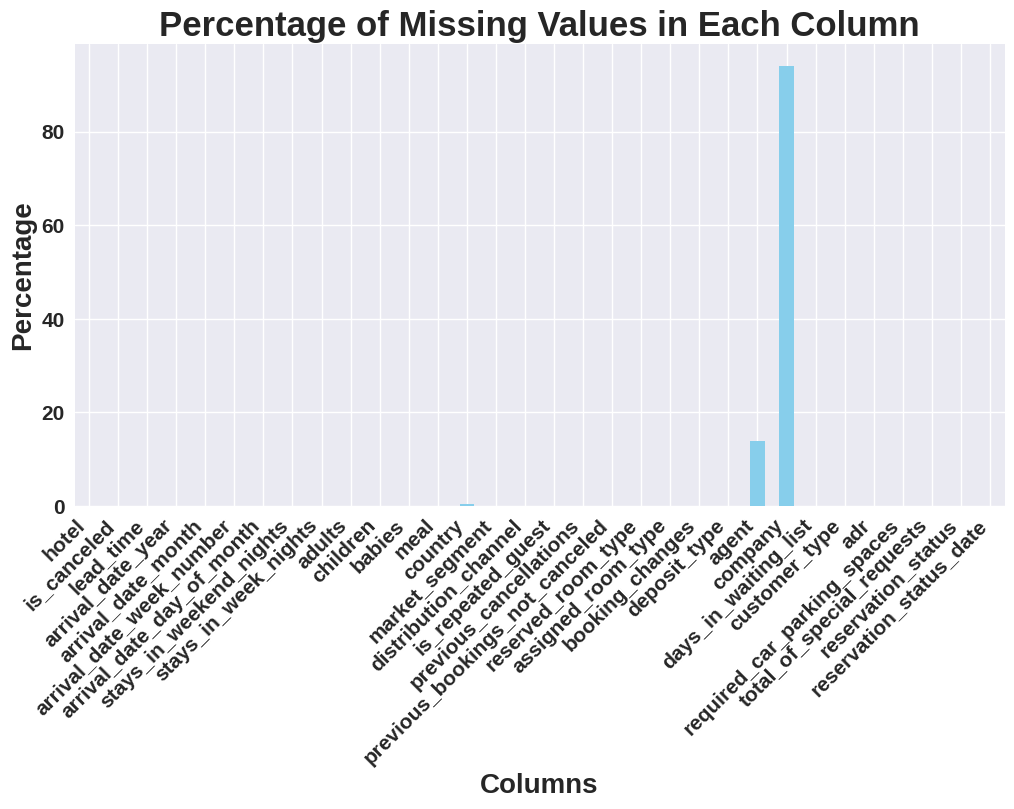

In [14]:
# Visualizing the missing values
# using heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values distribution using Heatmap')
plt.show()

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100).round(2)
# Create a bar chart to visualize missing value percentages
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

### What did you know about your dataset?

This dataset is a compilation of various booking informations between two types of hotels i.e., a city hotel and a resort hotel. The dataset has information like when the booking was made, the length of the stay, the number of adults, children or babies, available parking space, whether the stay is cancelled or not, country, meal and many more characteristics. The database has a total of 119390 rows and 32 specified columns. Now, I find out that this dataset contains duplicated items i.e., 31944 which should be taken care of so, it got removed out. This dataset has multiple types of data, but some columns datatype is not accurate so I will remove them later. Then I visualizes the null values using heat map and bar chart.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print(list(df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [16]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical column
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396,86944,87396,87396,87396.000000,87396.000000,87396.000000,87396,87396,87396.000000,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67978,27453,51618,69141,NaN,NaN,NaN,56552,46313,NaN,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,NaN,NaN,NaN,NaN,0.039075,0.030413,0.183990,NaN,NaN,0.271603,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,NaN,NaN,NaN,NaN,0.193775,0.369145,1.731894,NaN,NaN,0.727245,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description

### **The column name with its specifications is listed below:**
1. hotel: Type of the hotel (Resort Hotel or City Hotel)
2. is_canceled: If the booking was canceled (1) or not (0)
3. lead_time: Number of days before the actual arrival of the guests
4. arrival_date_year: Year of arrival date
5. arrival_date_month: Month of month arrival date
6. arrival_date_week_number: Week number of year for arrival date
7. arrival_date_day_of_month : Day of arrival date
8. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.
9. stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.
10. adults: Number of adults among guests
11. children : Number of children among guests
12. babies : Number of babies among guests
13. meal : Type of meal booked
14. country : country of guests
15. market_segment : segment of the market whether online, offline, corporate or direct
16. distribution_channel : channel of distribution
17. is_repeated_guest : whether the guest is repeated guest
18. previous_cancellations : whether cancellation is somewhere previously done by the guest
19. previous_bookings_not_cancelled : whether previous bookings canceled or not
20. booking_changes : any change in the booking
21. assigned_room_type: Code of room type assigned
22. booking_changes: Number of changes/amendments made to the booking
23. deposit_type: Type of the deposit made by the guest
24. agent: ID of travel agent who made the booking
25. company: ID of the company that made the booking
26. days_in_waiting_list: Number of days the booking was in the waiting list
27. customer_type: Type of customer, assuming one of four categories
28. adr: Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. required_car_parking_spaces: Number of car parking spaces required by the customer
30. total_of_special_requests: Number of special requests made by the customer
31. reservation_status: Reservation status (Canceled, Check-Out or No-Show)
32. reservation_status_date : Date at which the last reservation status was updated



### Check Unique Values for each variable.

In [17]:
# Check unique values for each variable
print(df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

## **Data Cleaning**

In [18]:
#Checking which of the columns has null values, we have already stored the sum of all the null values in each of the column in variable named-'miss_values'
miss_values[:4]

company     82137
agent       12193
country       452
children        4
dtype: int64

In [19]:
#checking percentage of null values in each column

#1. 'company' column
company_null_percentage=miss_values[0]*100/unique_rows
print("Percentage of nullvalues in company column is ",company_null_percentage)

#2. 'agent' column
agent_null_percentage=miss_values[1]*100/unique_rows
print("Percentage of nullvalues in agent column is ",agent_null_percentage)

#3. 'country' column
country_null_percentage=miss_values[2]*100/unique_rows
print("Percentage of nullvalues in country column is ",country_null_percentage)

#4. 'children' column
children_null_percentage=miss_values[3]*100/unique_rows
print("Percentage of nullvalues in children column is ",children_null_percentage)

Percentage of nullvalues in company column is  93.98256213098998
Percentage of nullvalues in agent column is  13.951439425145315
Percentage of nullvalues in country column is  0.5171861412421621
Percentage of nullvalues in children column is  0.004576868506567806


In [20]:
# Write your code to make your dataset analysis ready.
# It is better to drop company column as the percentage of null values present is very high
df.drop(['company'], axis=1, inplace=True)

In [21]:
# null values count in agent column is not that a big number, so replacing the values by 0
df['agent'].fillna(value=0, inplace=True)
#again rechecking if 'agent' column is left with any of the null value
df['agent'].isnull().sum()

0

In [22]:
# null values count in country column is not that a big number, so replacing the values by 'others' as country name
df['country'].fillna(value='others', inplace=True)
#again rechecking if 'country' column is left with any of the null value
df['agent'].isnull().sum()

0

In [23]:
# null values count in children column is not that a big number, so filling the values by 0
df['children'].fillna(value=0, inplace=True)
#again rechecking if 'children' column is left with any of the null value
df['children'].isnull().sum()

0

In [24]:
#checking whether any of the column is left with nullvalues
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## **Changing datatypes as per the data**

In [25]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [26]:
#We can see that ''children' and 'agent'column has int values but their datatype is float so converting them into their desired datatype
df[['children','agent']]= df[['children','agent']].astype('int64')

In [27]:
# converting object type to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

### **Addition of new columns as per requirement**

In [29]:
# Adding a column total_night_stays
df['total_night_stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_night_stays']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_night_stays, Length: 87396, dtype: int64

In [30]:
# Adding a revenue generated column by multiplying total_night_stays with adr
df['revenue']= df['total_night_stays']*df['adr']
df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87396, dtype: float64

In [31]:
# Finding total number of guests involved in a booking
df['total_guests']=df['adults']+df['children']+df['babies']
df['total_guests']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: total_guests, Length: 87396, dtype: int64

In [32]:
#Making some of the columns data more readable
#1. in column 'is_canceled' , replacing (0,1) with ('is not canceled','is canceled')
df['is_canceled']= df['is_canceled'].replace([0,1],['is not canceled','is canceled'])
df['is_canceled']

0         is not canceled
1         is not canceled
2         is not canceled
3         is not canceled
4         is not canceled
               ...       
119385    is not canceled
119386    is not canceled
119387    is not canceled
119388    is not canceled
119389    is not canceled
Name: is_canceled, Length: 87396, dtype: object

In [33]:
#2. in column 'is_repeated_guest', replacing (0,1) with ('not repeated one',repeated one')
df['is_repeated_guest']= df['is_repeated_guest'].replace([0,1],['not repeated one','repeated one'])
df['is_repeated_guest']

0         not repeated one
1         not repeated one
2         not repeated one
3         not repeated one
4         not repeated one
                ...       
119385    not repeated one
119386    not repeated one
119387    not repeated one
119388    not repeated one
119389    not repeated one
Name: is_repeated_guest, Length: 87396, dtype: object

In [34]:
#estimating hotel wise revenue
hotel_wise_revenue=df.groupby('hotel')['revenue'].sum()
hotel_wise_revenue

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64

In [35]:
df[['hotel','revenue']]

,hotel,revenue
0,Resort Hotel,0.00
1,Resort Hotel,0.00
2,Resort Hotel,75.00
3,Resort Hotel,75.00
4,Resort Hotel,196.00
...,...,...
119385,City Hotel,672.98
119386,City Hotel,1578.01
119387,City Hotel,1103.97
119388,City Hotel,730.80


In [36]:
#checking for those columns where 'total_guests' count is 0
null_guests_count=df[df['total_guests']==0]
null_guests_count                                          #it means no bookings were made during these days so dropping this count

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night_stays,revenue,total_guests
2224,Resort Hotel,is not canceled,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,not repeated one,0,0,A,I,1,No Deposit,0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,3,0.00,0
2409,Resort Hotel,is not canceled,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,not repeated one,0,0,A,I,0,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0,0.00,0
3181,Resort Hotel,is not canceled,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,not repeated one,0,0,A,C,0,No Deposit,38,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,3,0.00,0
3684,Resort Hotel,is not canceled,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,not repeated one,0,0,A,A,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,5,0.00,0
3708,Resort Hotel,is not canceled,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,not repeated one,0,0,A,C,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,6,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,is not canceled,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,not repeated one,0,0,A,A,1,No Deposit,7,0,Transient,100.80,0,0,Check-Out,2017-06-30,3,302.40,0
115091,City Hotel,is not canceled,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,not repeated one,0,0,E,K,0,No Deposit,0,0,Transient,0.00,1,1,Check-Out,2017-07-01,1,0.00,0
116251,City Hotel,is not canceled,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,not repeated one,0,0,A,K,2,No Deposit,425,0,Transient,73.80,0,0,Check-Out,2017-07-17,2,147.60,0
116534,City Hotel,is not canceled,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,not repeated one,0,0,A,K,1,No Deposit,9,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,7,160.02,0


In [37]:
#dropping all the 166 rows having no guests count
df=df[df['total_guests']!=0]

In [38]:
#Checking final shape of the dataset
df.shape

(87230, 34)

### What all manipulations have you done and insights you found?

The manipualtions I have done are:

**1.Addition of columns:**

We have seen that few columns were required for better understanding of the data.

**Total number of guests:**
By adding number of adults, children and babies we could evaluate total number of guests in a booking and the total revenue generated out of each booking.

**Revenue:**
By multiplying total number of guests with adr. This column is helpful in evaluating total growth of a hotel.

**2.Deletion of columns:**

**Company:**
This column was having a high percentage of null or missing data so, I dropped this irrelevant column.

**3.Deletion of rows:**

After calculation total number of guests involved in a booking, I find out that few of the rows have null values which meant that no bookings were made during that tenure, so I dropped 166 rows having 0 as a guest count.

**4.Replacing null values in columns:**

After calculating null values count in each column, I find out that 'company',' agent' and 'children' column do have missing or null values but percentage of null values is low. So instead of dropping these columns I replaced null values by 'others', 0 and 0.

Also, in the column 'is_canceled', it had values like 0,1 representing status of booking. So, I replaced these values with a understandable input i.e., 'is not canceled' and 'is canceled'.

The column 'is_repeated_guests' also had same issue, so replacing 0 and 1 with 'not repeated one' and 'repeated one'.

**5.Changing datatypes of few of the columns:**

by df.info , some columns like 'agent','children' which had int values but their datatype is float so converting them into their desired datatype. Also, 'reservation_status_date' to datetime.

**6.Removed null values and duplicate values:**

Before visualizing, null values and duplicate values should be taken care of. So, I removed duplicate data rows from the dataset and null values columns were removed or their data was replaced earlier.

Now, the data is clean and ready for analysis


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **EDA (Exploratory Data Aanalysis)**

## **Univariate Analysis**

#### Chart - 1

Text(0.5, 1.0, 'Booking percentage of Hotel')

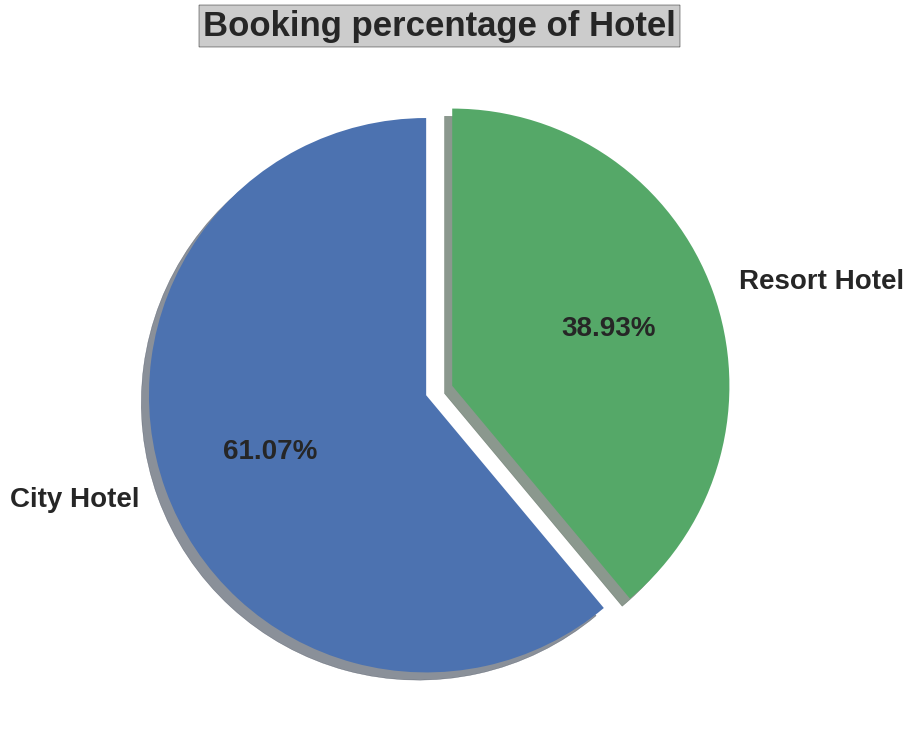

In [51]:
# Chart - 1 visualization code
# Visualizing the by pie chart.
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.2f%%', startangle=90,shadow=True, figsize=(14,9),fontsize=20)
plt.ylabel('')
plt.title('Booking percentage of Hotel',bbox={'facecolor':'0.8','pad':3})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [40]:
# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9,28721
174,240,13028
14,14,3342
7,7,3294
183,250,2779
175,241,1644
27,28,1493
8,8,1383
1,1,1228
6,6,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

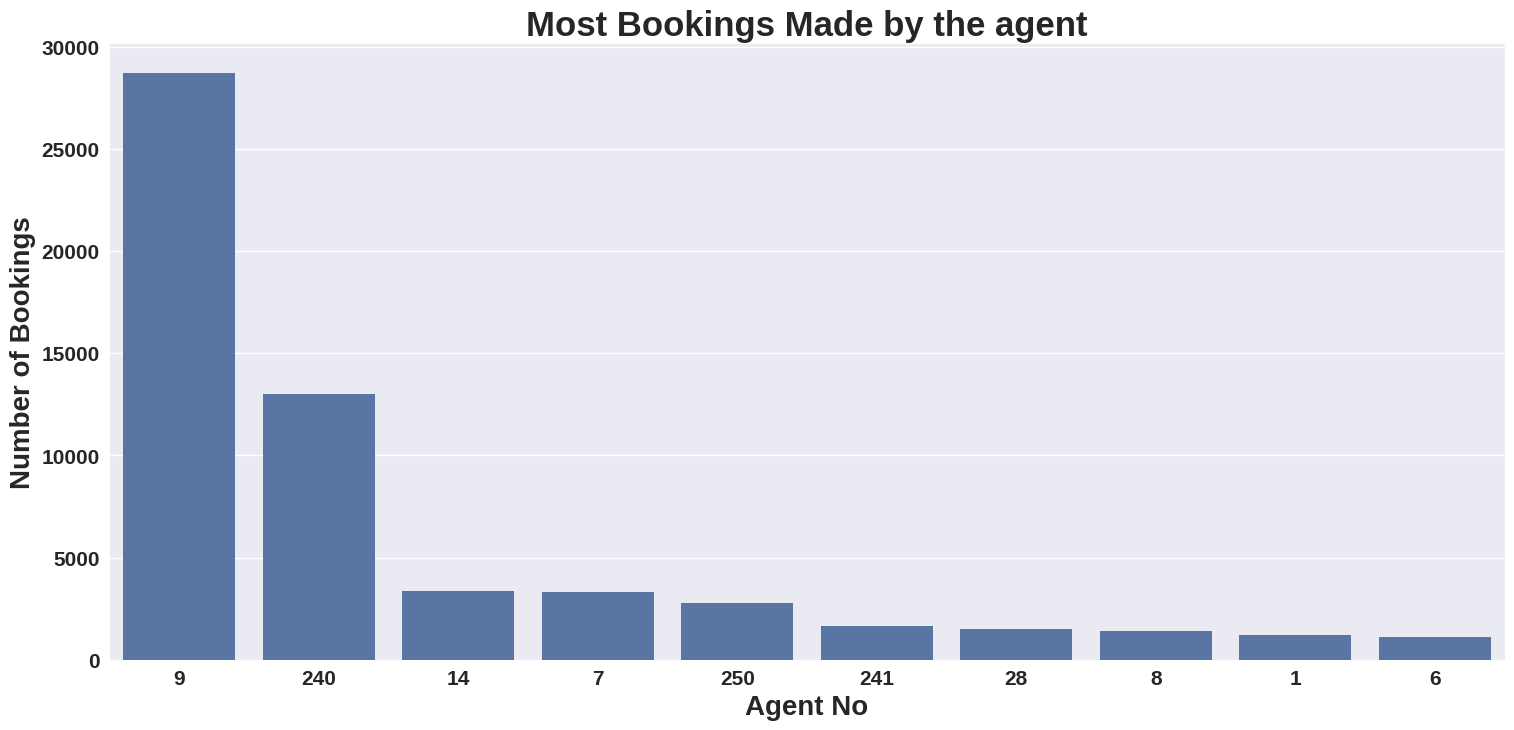

In [41]:
# Chart - 2 visualization code
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Cancellation and non Cancellation')

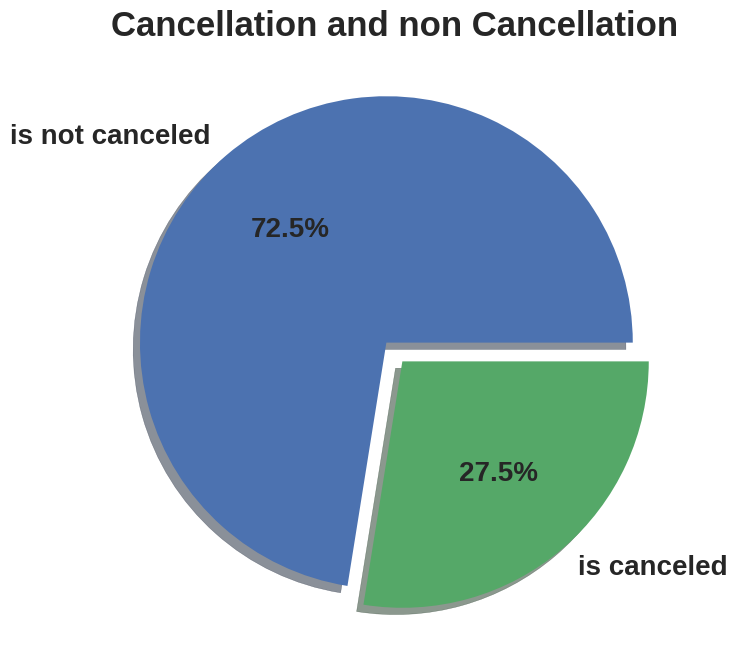

In [43]:
# Chart - 3 visualization code
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.ylabel('')
plt.title("Cancellation and non Cancellation")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, ' Percentage of repeated guests')

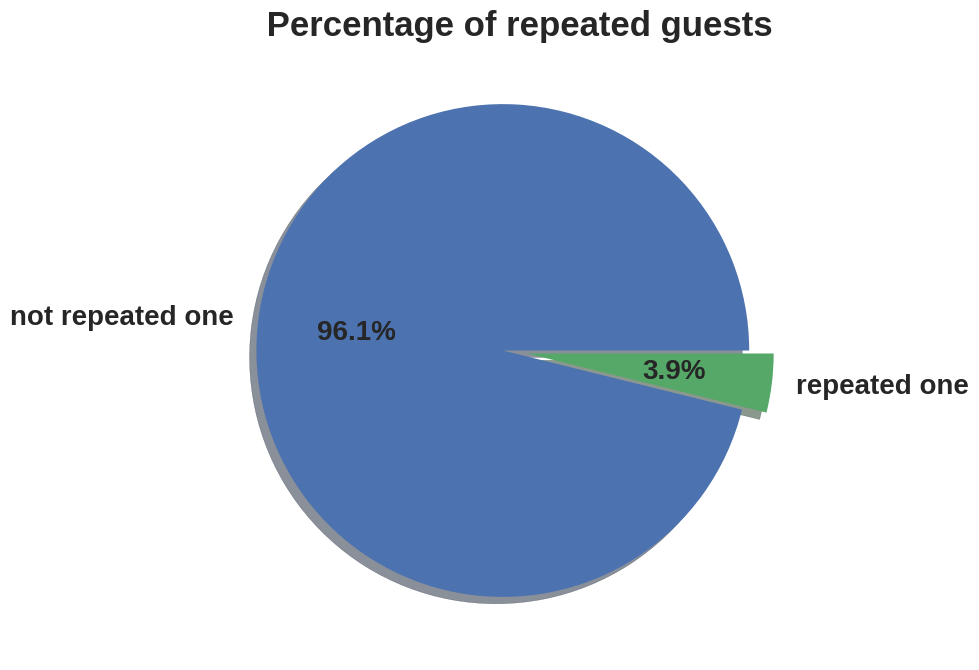

In [45]:
# Chart - 4 visualization code
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)
plt.ylabel(" ")
plt.title(" Percentage of repeated guests")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

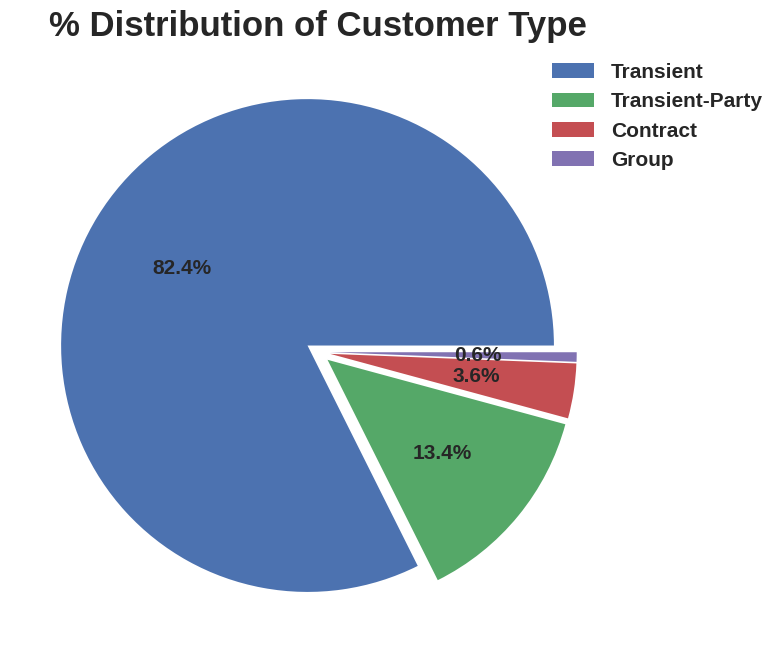

In [52]:
# Chart - 5 visualization code
df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)
labels=df['customer_type'].value_counts().index.tolist()
plt.ylabel("")
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

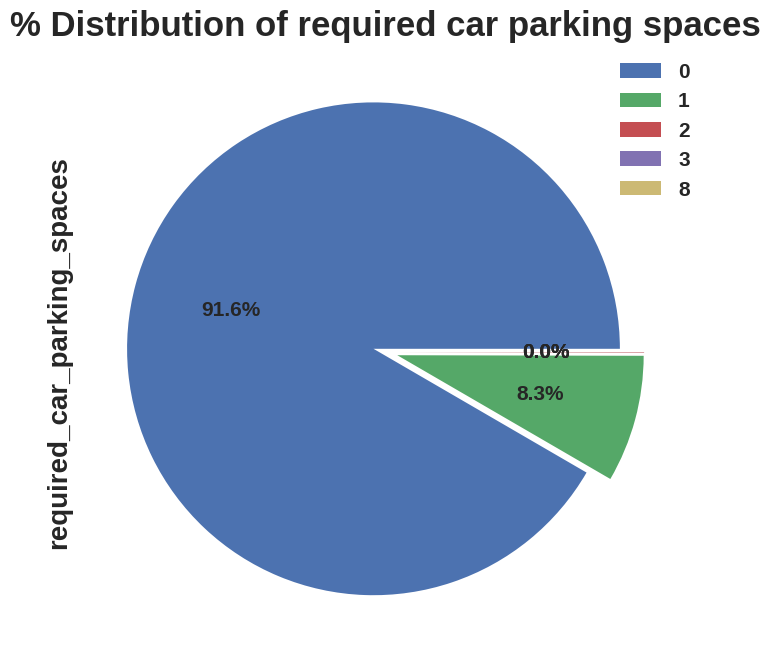

In [53]:
# Chart - 6 visualization code
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)
labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0, 0.5, 'Percentage(%)')

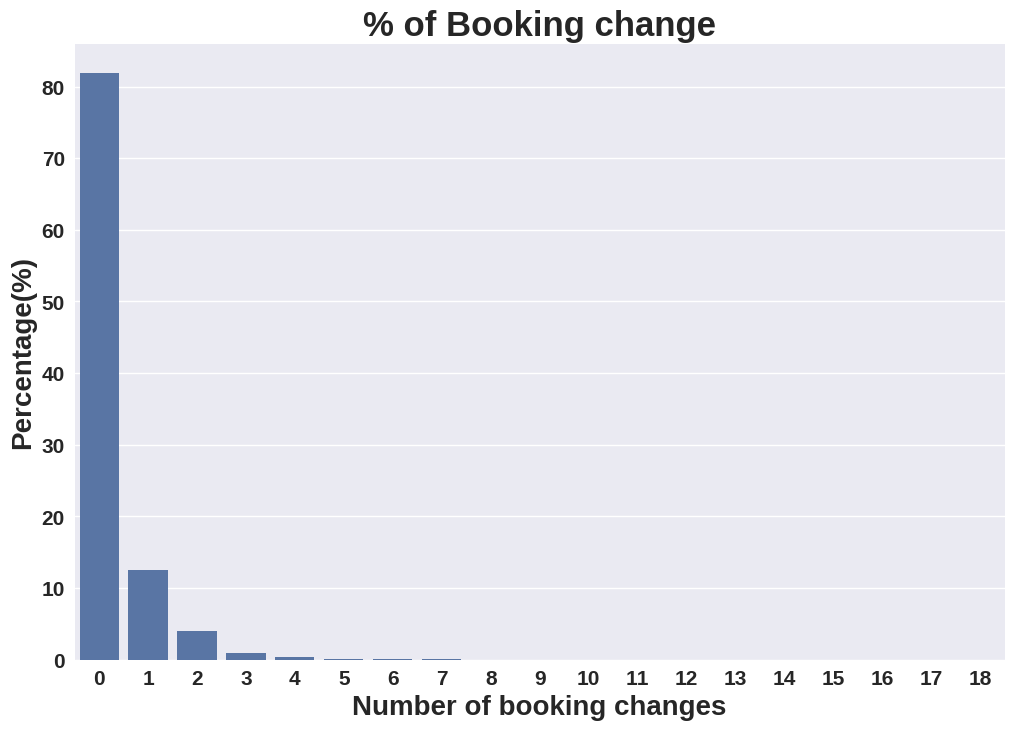

In [55]:
# Chart - 7 visualization code
booking_changes_df=df['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})
plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

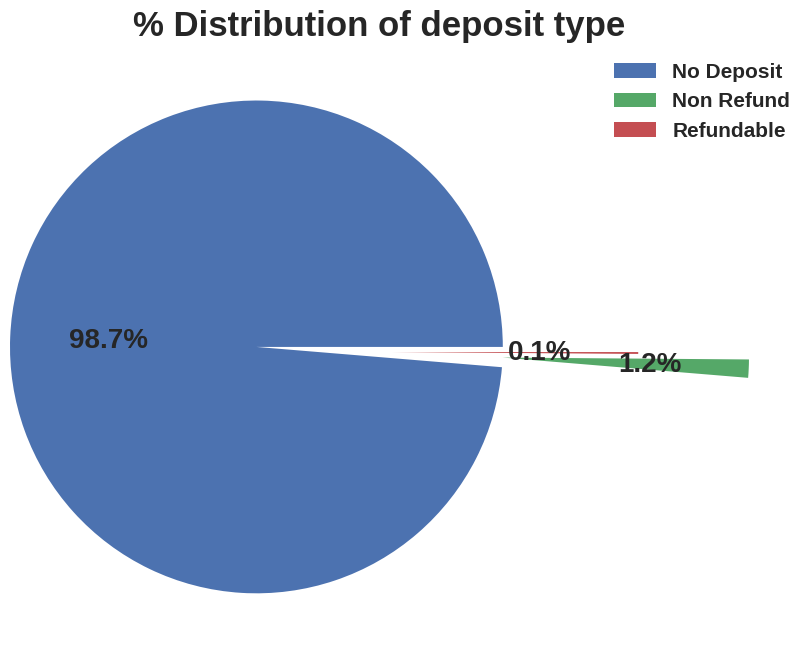

In [56]:
# Chart - 8 visualization code
df['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 1.0, 'Preferred Meal Type')

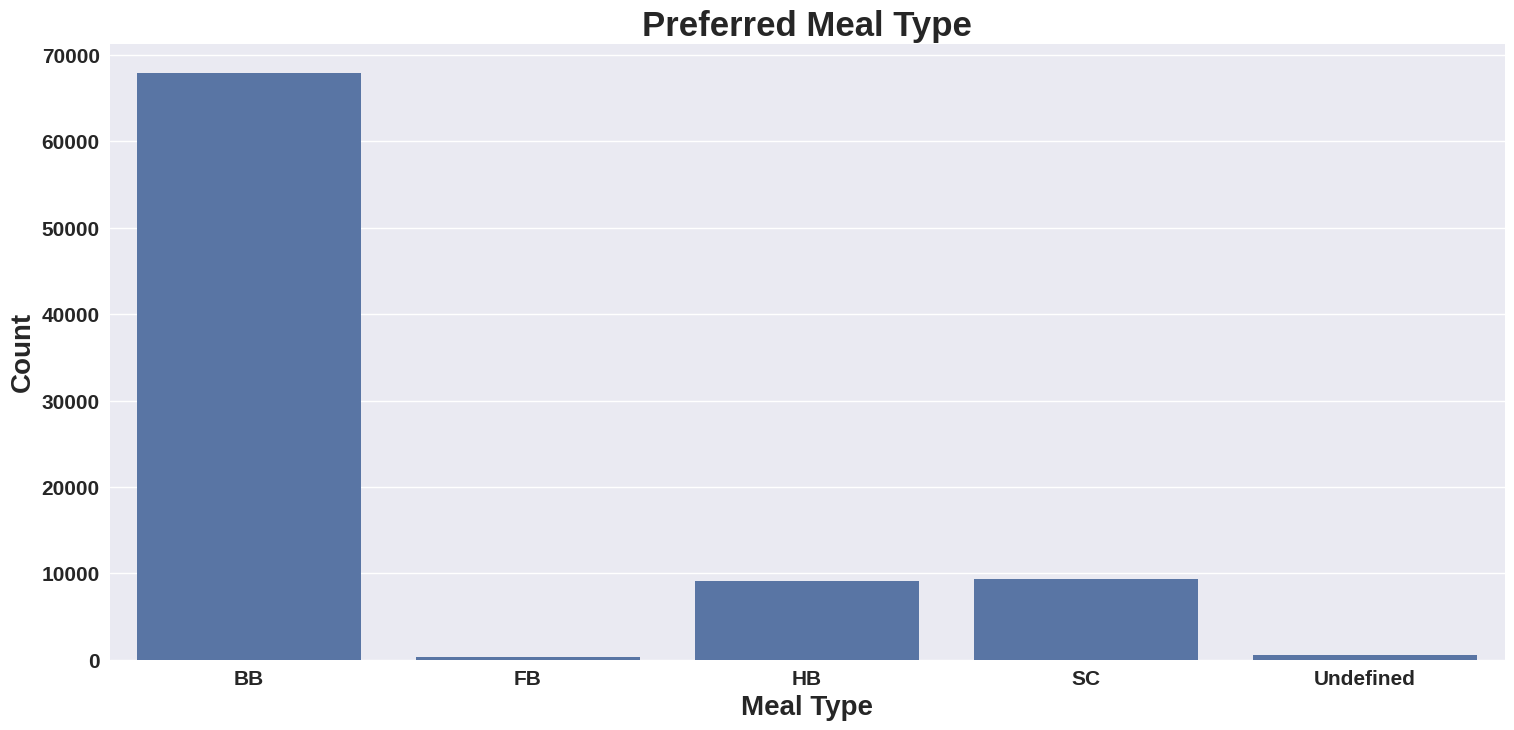

In [59]:
# Chart - 9 visualization code
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

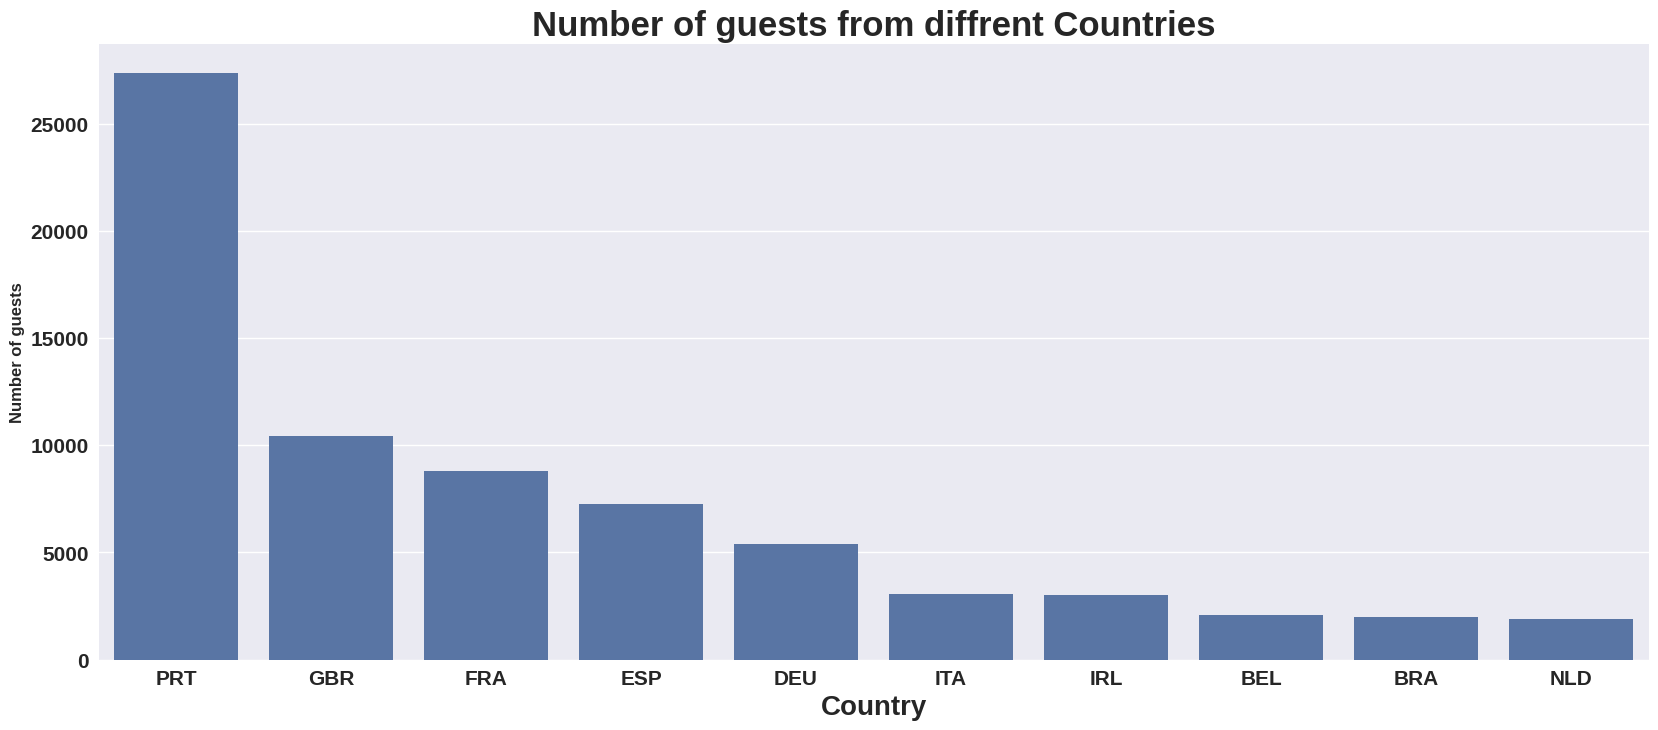

In [61]:
# Chart - 10 visualization code
# Counting the guests from various countries.
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

In [64]:
#importing the folium library
import folium                                # extra info taken from google
import plotly.express as px

In [63]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count of guests'], hover_name = country_df['country'])
guests_map.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Most preferred Room type')

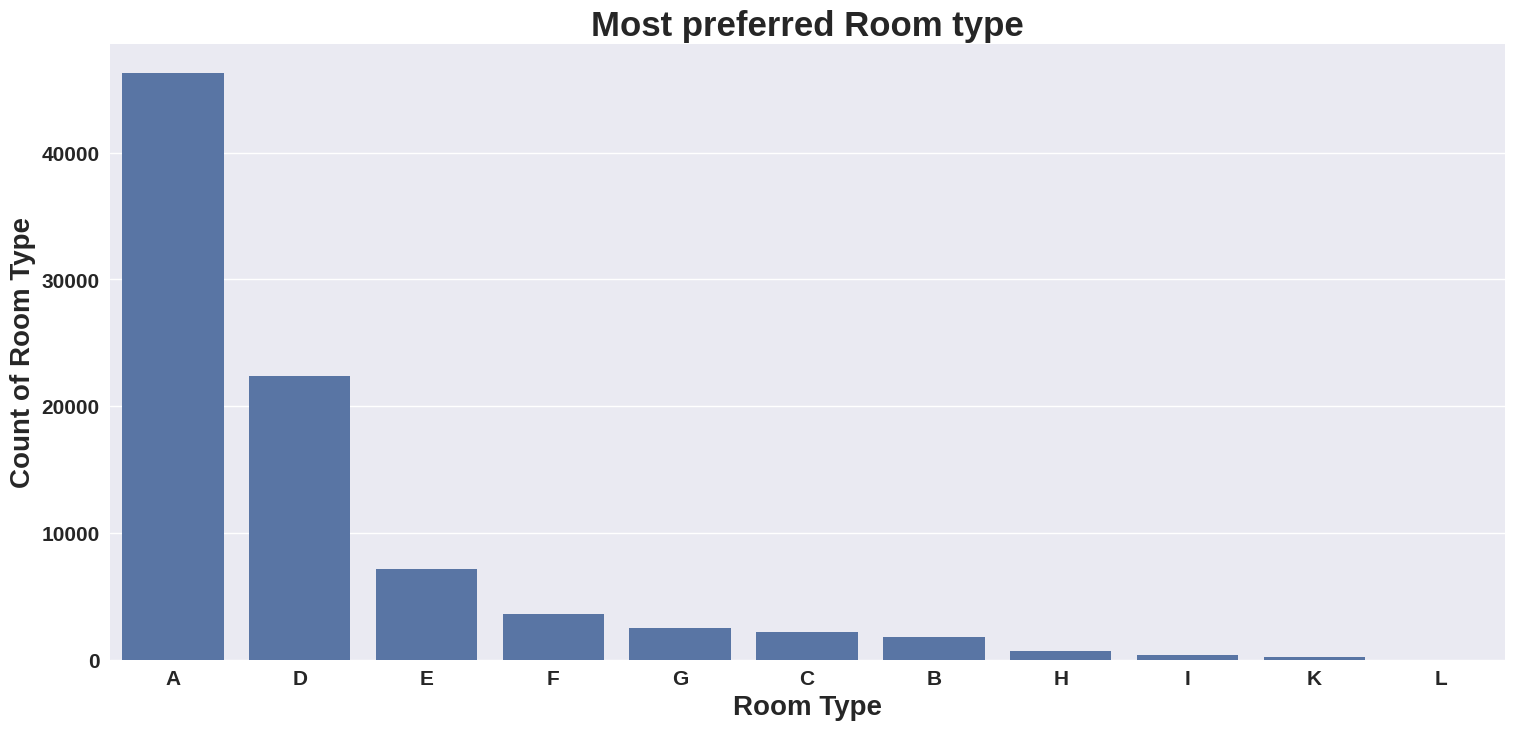

In [65]:
# Chart - 11 visualization code
#set plotsize
plt.figure(figsize=(18,8))

#plotting
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [66]:
# Chart - 12 visualization code
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df


,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

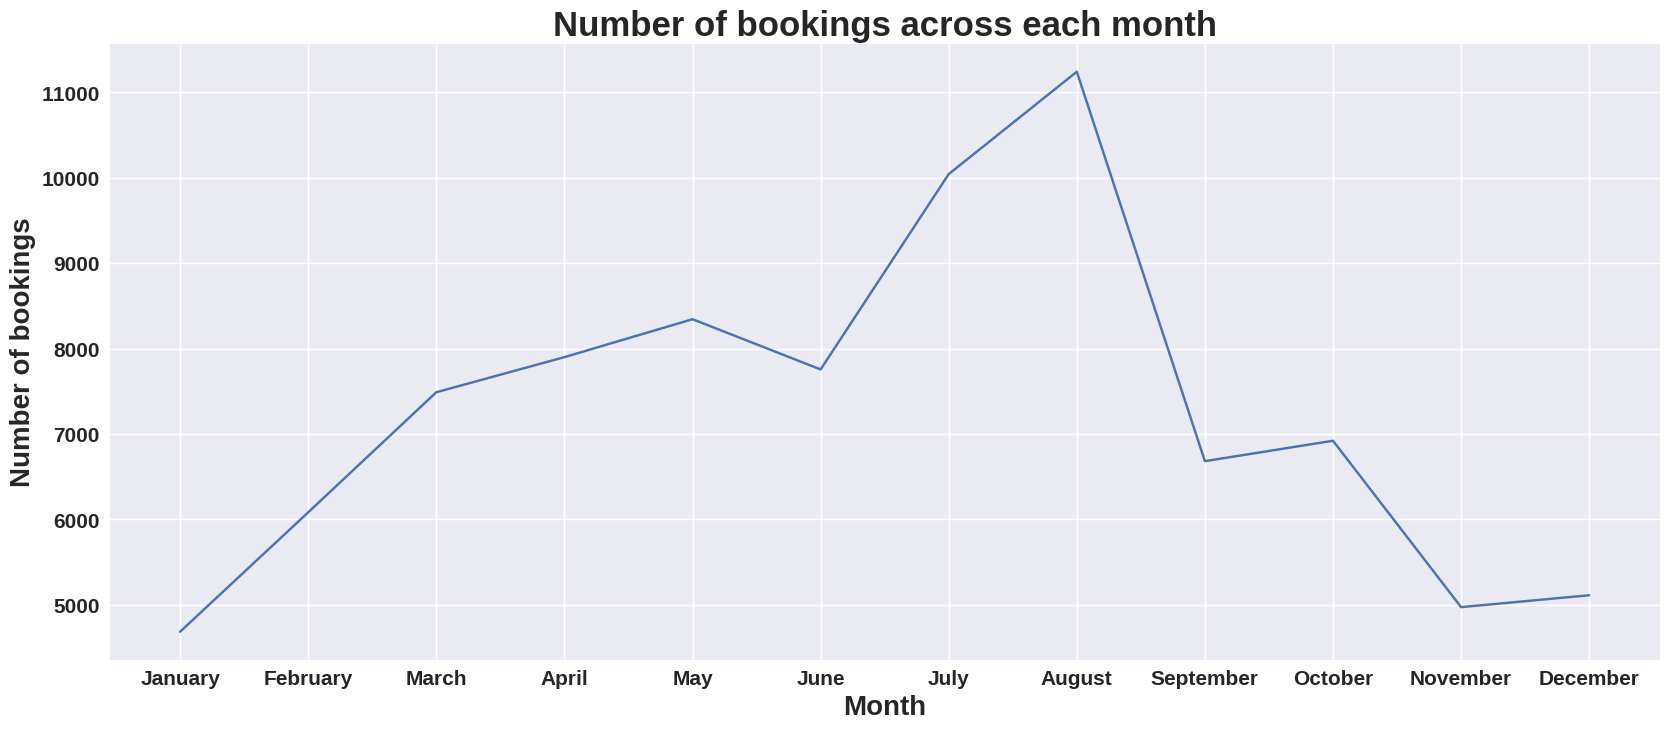

In [67]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

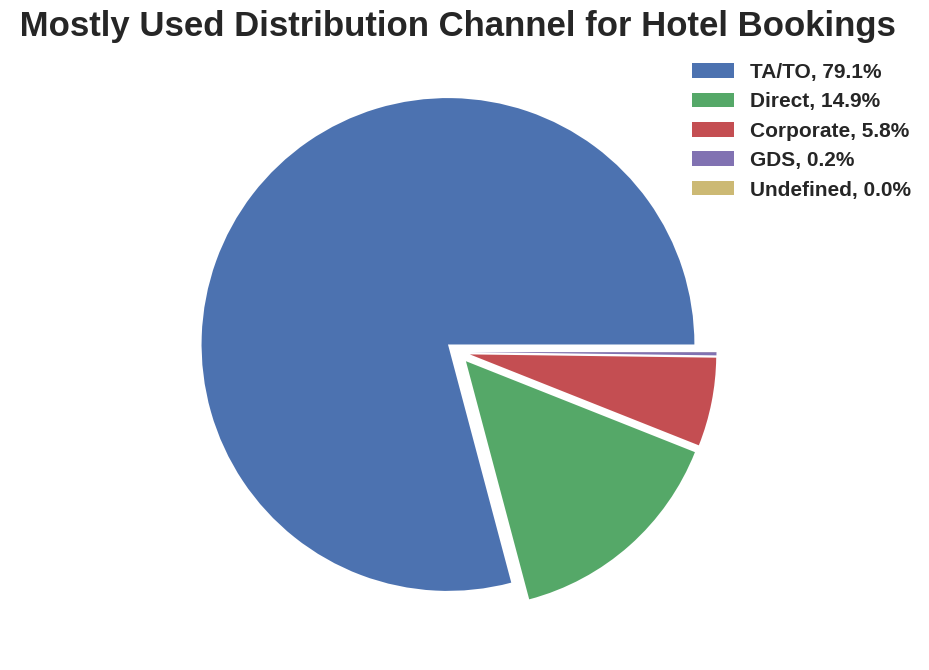

In [72]:
# Chart - 13 visualization code
#Creating labels
labels=df['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.ylabel("")
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Text(0.5, 1.0, 'Year Wise bookings')

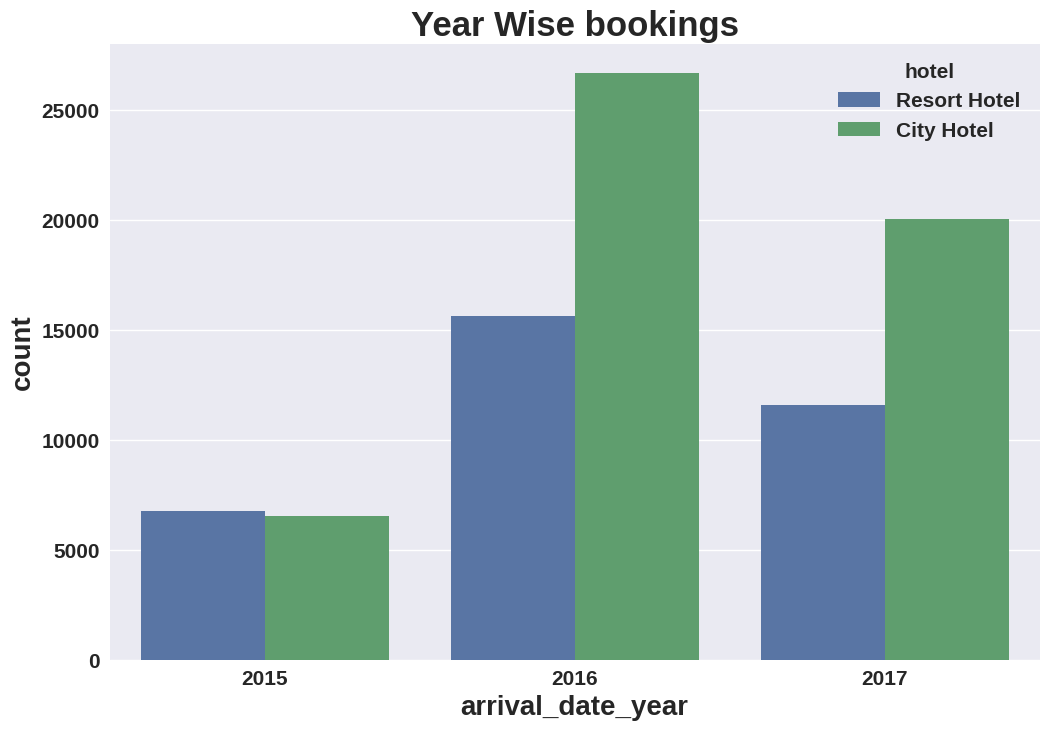

In [74]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***